# __Variable Neighborhood Search mit Variable Neighborhood Descent__ <br>


##### __Autor__: Hannes Forhoff <br>
##### __Modul__: Prescriptive Analytics – Belegarbeit <br>
##### __Thema__: Lösungsheuristik(VNS) für das Orienteering Problem (OP) <br>




In dieser Arbeit wird eine kombinierte Heuristik aus Variable Neighborhood Search (VNS) und Variable Neighborhood Descent (VND) zur Lösung des Orienteering Problems implementiert, analysiert und evaluiert. Das OP gehört zu den klassischen kombinatorischen Optimierungsproblemen, bei denen aus einer Menge möglicher Standorte eine zeitlich begrenzte Tour mit maximalem Gesamtnutzen (Score) konstruiert werden soll.<br>


__Zielsetzung:__ <br>
<br>
Das Ziel(Erreichtes Ergebniss) dieser Arbeit ist es, eine leistungsfähige und reproduzierbare Heuristik zu entwickeln, die für verschiedene Instanzgrößen(Instancen 1-5 + Prüfinstance) des Orienteering Problems robuste Lösungen mit hoher Ergebnisqualität liefert. Insbesondere soll die Kombination aus explorativen und intensivierenden Strategien innerhalb der VNS/VND-Logik genutzt werden, um lokale Optima systematisch zu durchbrechen und gleichzeitig effiziente Suchverläufe zu ermöglichen. Sodass das der Heuristik möglichst die Globalen Optima gefunden werden können.


__Beschreibung des Planungsproblems & der Inputdaten__ <br>

Bei dem vorliegenden Planungsproblem handelt es sich um eine Variante des bekannten Orienteering Problems (OP). Das Ziel besteht darin, eine Tour für ein Fahrzeug zu planen, das bei einem zentralen Depot startet, eine Auswahl von Orten (Knoten) besucht und zum Depot zurückkehrt. <br>
Jeder besuchte Knoten liefert einen bestimmten Score. Die Herausforderung liegt darin, die Route so zu wählen, dass die Summe der Scores der besuchten Knoten maximiert wird, ohne dabei ein vorgegebenes globales Zeit- oder Distanzlimit zu überschreiten. <br>

- Das Knapsack-Problem: Welche Teilmenge von Knoten soll besucht werden, um den "Wert" (Score) zu maximieren, ohne die "Kapazität" (das Zeitlimit) zu sprengen?

- Das Traveling Salesperson Problem (TSP): In welcher Reihenfolge sollen die ausgewählten Knoten besucht werden, um die "Kosten" (die benötigte Zeit/Distanz) zu minimieren?

Die Inputdaten für jede Probleminstanz werden über eine .json-Datei bereitgestellt. Diese Dateien enthalten alle notwendigen Informationen, die in der Klasse InputData verarbeitet werden: <br>

- Name: Ein eindeutiger Name für die Instanz

- TimeLimit: Die maximale erlaubte Gesamtdistanz für eine gültige Tour

- NodeCount: Die Gesamtanzahl der verfügbaren Knoten, inklusive des Depots

- Nodes: Eine Liste von Objekten, wobei jedes Objekt einen Knoten durch seine Id, seine X- und Y-Koordinaten und den zugehörigen Score definiert. Das Depot ist stets der Knoten mit der ID 1 und einem Score von 0

Zur Effizienzsteigerung wird bei der Initialisierung einer InputData-Instanz eine vollständige Distanzmatrix vorab berechnet, welche die euklidischen Distanzen zwischen allen Knotenpaaren speichert. Dies vermeidet wiederholte und rechenintensive Distanzberechnungen während des Optimierungsprozesses<br>


__Vorgehen (Methodik):__ <br>
<br>
Zum Einsatz kommt eine Kombination aus Variable Neighborhood Search (VNS) – um aus lokalen Optima auszubrechen – und Variable Neighborhood Descent (VND) zur gezielten lokalen Verbesserung der Lösungen. Die Heuristik arbeitet mit einem Pool an Kandidatenlösungen und nutzt Restart-Mechanismen, um regelmäßig neue Startpunkte ins Spiel zu bringen. Dafür werden verschiedene Nachbarschaftsoperatoren verwendet, wie z. B. das zufällige Entfernen und anschließende Reparieren von Knoten. <br>

1: Input: default neighborhood 𝑘0, start solution s0 <br>
2: Initialize: 𝑘 = 𝑘0, 𝑠 = 𝑠0 <br>
3: while abort criterion is not reached do <br>
___4: = Shaking(𝑠,𝑘) // not in first iteration  <br>
___5: 𝑠 = LocalSearch(𝑠‘,𝑘)   <br>
___6: 𝑘 = NeighborhoodChange(𝑘) <br>
7: end while<br>

Damit das Ganze reproduzierbar bleibt, wird im gesamten Ablauf konsequent mit einem einzigen, zentral gesteuerten Zufallsobjekt (random.Random(SEED)) gearbeitet. So verhalten sich alle zufälligen Entscheidungen – von der Startlösung bis zum letzten Shake – bei identischem Seed immer gleich. <br>
Die Qualität der gefundenen Lösungen wird anschließend anhand von Score, Gesamtdistanz und Tourlänge bewertet.<br>


### __Gliederung OffiziellesNotebook_HannesForhoff_VNS_OP.ipynb__ <br>

1. Code-Struktur: Eine grobe Übersicht über die Projektdateien <br>
2. Instance Durchlauf (Code) <br>
  2.1 Benötigte Packete<br>
  2.2 Instance Durchlauf mit 3 min Beschränkung (Hier ihre TestInstance 6 "einfügen/testen") <br>
  2.3 Instance Durchlauf mit 3 min Beschränkung (Instance 1-5 Vorgerechnet) <br>
  2.4 Instance Durchlauf mit 9 min Beschränkung (Instance 1-5 Vorgerechnet)<br>
  2.5 Codierung und Bewertung von Lösungen <br>
  2.6 ParameterAnalyse <br>
  2.7 Seed Analyse/Test <br>
  2.8 Demonstration/Beispiel Shaking <br>
  2.9 Demonstration einer Local-Search-Methode <br>
3. Details/Vorgehen/Entscheidungen  <br>
  3.1 Genaue Beschreibung des Durchlaufes einer Instanz/Wie funktioniert der Algorythmus?      
  3.2 Strategie zur Diversifikation und Intensivierung: Ein adaptiver VNS-Ansatz<br>
  3.3 Wahl der lokalen Suchstrategie: Best Improvement vs. First Improvement<br>
4. Verworfene/ Getestete Inhalte <br> 
5. Visuelle Darstellung StartLösung/FinalVNS & HEATMAP  <br>
6. Literatur 


### __1. Code-Struktur: Eine Übersicht über die Projektdateien__

Mein Projekt ist modular in mehrere Python-Dateien aufgeteilt. Jede Datei hat eine spezifische Aufgabe innerhalb des Lösungsansatzes. Vorbild dafür war der Aufbau aus den Übungen.<br>
Im Folgenden wird die Funktion jeder einzelnen Datei kurz erläutert, damit ein leichter Einstieg und eine gute Übersicht ermöglicht wird. (Für leichtere Bewertung/ANalyse)<br>


0. __TestBereich.ipynb - Testumgebung__ <br>
    Zweck : <br>
    Dieses NoteBook diente zum Testen während der Entwicklung/Implementierung der Heuristik usw. <br>
    Sie können sich das gerne mit anschauen aber es ist wenig strukturiert, kaum mit Kommentaren versehen und vieles funktioniert auch nicht(mehr), da vieles auch wieder verworfen wurde. <br>
    Jedoch kann man am TestBereich gut erkenn wie und in welcher Reihenfolge ich vorgegangen bin(Auch wenn es etwas chaotisch ist)<br>


1. __InputData.py – Fundament__ <br>

    Zweck: <br>
    Diese Datei : Einlesen und Verwalten der Instanzen. <br>
    Sie liest eine .json-Datei ein, extrahiert alle relevanten Informationen wie das Zeitlimit, die Anzahl der Knoten und deren Koordinaten sowie Scores.<br>

    Kernfunktion: <br>
    Eine zentrale Aufgabe dieser Klasse ist die Vorberechnung einer Distanzmatrix. Dadurch müssen die (euklidischen) Distanzen zwischen zwei Knoten nicht bei jeder Abfrage neu berechnet werden, was den Algorithmus erheblich beschleunigt.<br>
    Man kann einfach mit data.get_distance(id1, id2) darauf zugreifen. (Siehe TestBereich.ipynb ganz oben)<br>

2. __OutputData.py – Lösungsklasse__ <br>

    Zweck: <br>
    Definiert die TourSolution-Klasse, die eine einzelne Lösung (eine Tour) repräsentiert.<br>

    Kernfunktion: <br>
    Die Klasse ist "selbstreparierend": Sie stellt sicher, dass jede Tour immer syntaktisch korrekt ist (beginnt und endet bei Depot 1, keine Duplikate). <br>
    Noch wichtiger ist die evaluate()-Methode, die für eine gegebene Tour den Gesamtscore und die Gesamtdistanz berechnet und prüft, ob das Zeitlimit eingehalten wird (is_valid).<br>

3. __ConstructiveHeuristic.py – Startpunkt__<br>

    Zweck: <br>
    Hier sind verschiedene Heuristiken implementiert, um eine erste, plausible Startlösung zu erzeugen. <br>
    Eine gute Startlösung ist entscheidend für den Erfolg der nachfolgenden Optimierung.<br>
    Vorsicht ! : Viele Startlösungen waren nur Tests und wurden aus verschiedenen Gründen verworfen! Um zu sehen welche wirklich verwendet wurden sind schauen sie in StartSolutionSelector.py wo die beiden methoden = ["greedy", "best_insertion"] von ConstuctivHeuristic.py aufgerufen werden.<br>

    Kernfunktion: <br>
    Enthält Methoden wie greedy_solution und best_insertion_solution. Über eine Factory-Funktion generate_solution() kann die gewünschte Heuristik einfach aufgerufen werden.<br>

4. __StartSolutionSelector.py – Strategische Auswahl der Startlösung__ <br>

    Zweck: <br>
    Anstatt sich auf nur eine Heuristik zu verlassen, führt diese Datei zwei Start-Heuristiken aus und wählt die beste (die mit dem höchsten initialen Score) als Ausgangspunkt für die VNS aus.<br>
    Ich habe diesen Ansatz gewählt da Greedy und best_insertion bei unterschiedlichen Instancen unterschiedlich performt haben. <br>

    Kernfunktion: <br>
    Die select_best_start_solution()-Funktion agiert als eine Art Wettbewerb, um sicherzustellen, dass die VNS mit der vielversprechendsten Grundlage beginnt.<br>
    Überlegung war : Best StartSolution resultiert in der besten End Solution <br>

5. __Neighborhood.py – VSN und VND Struktur/Logik__ <br>

    Zweck: <br>
    Diese Datei enthält das Set zur Veränderung von Touren. Sie ist in zwei Hauptbereiche unterteilt: Shaking(VNS) und Lokale Suche(VND).<br>

    Kernfunktionen:<br>
    Shaking-Methoden (random_modify, remove_k_random_nodes etc.): Dienen der Diversifikation. <br>
    Sie stören eine bestehende Lösung stark, aber kontrolliert, um den Algorithmus aus lokalen Optima zu befreien und neue Bereiche des Lösungsraums zu erkunden.<br>
    Shaking ist auch die Kernfunktion/Fokus der BelegArbeit.<br>

    Local-Search-Methoden (add_best_node, replace_node etc.): <br>
    Dienen der Intensivierung. Sie nehmen eine Lösung und verbessern sie durch kleine, gezielte Züge in ihrer unmittelbaren Nachbarschaft, bis keine Verbesserung mehr möglich ist.<br>

6. __VNS.py – GesamtAblauf__ <br>

    Zweck: <br>
    Das ist die Hauptsteuerungsdatei, die den gesamten Optimierungsprozess der Variable Neighborhood Search (VNS) und dessen Ablauf stuert.<br>

    Kernfunktion: <br>
    Die run_vns()-Funktion implementiert die übergeordnete VNS-Logik: Sie nimmt eine Startlösung, wendet wiederholt einen Zyklus aus Shaking (aus Neighborhood.py) und anschließender intensiver lokaler Suche (Variable Neighborhood Descent, VND, ebenfalls mit Methoden aus Neighborhood.py) an. <br> 
    Sie verwaltet außerdem einen Pool guter Lösungen, eine adaptive Restart-Strategie und die Abbruchkriterien (Zeitlimit, Stagnation), um die Suche zu einem guten Ende zu führen. <br>
    Die parametrisierte Version run_vns_parametrized wurde speziell für die Durchführung der Analyse-Experimente entwickelt. (Am Anfang waren die noch Zusammenhängend)<br>

Erzeugung von Startlösungen Beispiel / Test :  <br>

Vor dem Beginn der eigentlichen Optimierung werden mehrere konstruktive Heuristiken ausgeführt, die jeweils auf unterschiedliche Weise eine erste, gültige Tour erstellen. In unserem finalen Ansatz haben sich zwei Heuristiken als besonders effektiv erwiesen:<br>

- Greedy-Heuristik (greedy_solution): Eine schnelle, gierige Methode die iterativ den Knoten mit dem besten lokalen Score-zu-Kosten-Verhältnis auswählt.<br>
- Best-Insertion-Heuristik (best_insertion_solution): Eine aufwändigere aber oft qualitativ hochwertigere Methode. Fügt Iterativ den besten Knoten ein, der die Gesamtdistanz der Tour am geringsten erhöht.<br>

In [12]:
from InputData import InputData
from StartSolutionSelector import select_best_start_solution
import random

data_i3 = InputData("Instanzen/Instance_3.json")
rnd_gen = random.Random(42) # Fester Seed für Reproduzierbarkeit

start_solution, method = select_best_start_solution(data_i3, rnd=rnd_gen)

print(f"Gewählte Startmethode für Instanz 3: {method}")
print(f"Startlösung:\n{start_solution}")

Gewählte Startmethode für Instanz 3: greedy
Startlösung:
Tour: [1, 22, 24, 14, 20, 17, 16, 15, 13, 3, 4, 5, 7, 27, 23, 32, 26, 1]
Score: 410
Gesamtdistanz: 485.95
Verwendete Zeit: 485.95
Gültig (<= 490): ✅


### __Instance Durchlauf (Code)__ <br>

##### __2.2 Benötigte Packete__ <br>

- pandas <br>
- numpy <br>
- matplotlib <br>
- openpyxl<br>

Installation : <br>
pip install pandas numpy matplotlib openpyxl


##### __2.2 Instance Durchlauf mit 3 min Beschränkung (Hier ihre TestInstance 6 "einfügen/testen")__ <br>

Ihre Test Instance einfach in den Ordner Instanzen einfügen und passend benennen (Instance_6) und ausführen. <br>
Gib dann alles von 1-6 Zurück <br>
Inklusive : 
- Finaler Weg
- Gebrauchter Zeit
- Score
- Verwendeter Startmethode
- Startscore
- Verbessert = Ob die Heuristik die den Score im vergleich zur Startmethode verbessert hat


Auch zu sehen sind die Logs : 
- Zum nach Vollziehen welche Verbesserungen wann gefunden wurden sind 
- Wann Restarts genutzt wurden
- Wann durch vns_stagnation_limit der gezwungene Abbruch erzeugt wurde
- Wie lange jede Instance verarbeitet wurde bis ein Abbruchkriterium gegriffen hat (3 min oder 150 = vns_stagnation_limit)
- Bei jeder Verbesserung im Score wird der verwendete Weg angezeigt damit, sie den genutzten weg(falls gebraucht) nachvollziehen können. 

In [ ]:
import pandas as pd
import random
import time

# Stellt sicher, dass Pandas die vollen Touren anzeigt
pd.set_option('display.max_colwidth', None)

from InputData import InputData
from StartSolutionSelector import select_best_start_solution
from VNS import run_vns

SEED = 42
results = []
output_excel_file1 = "Ergebnisse_VNS_Lauf_3min_6_Instanzen.xlsx"

for i in range(1, 7):#### HIER ihre TestInstance Testen|Wurde schon auf 7 erhöht | Nach dem Einfügen in den Ordner Instanzen und bennung nach dem Vorhandenen Schemata (Also Instance 6) einfach ausführen  
    # GLOBALER STARTZEITPUNKT 
    global_start_time = time.time()
    
    print(f"\n Starte Prozess für Instanz {i}...")
    filename = f"Instanzen/Instance_{i}.json"
    
    # 1. Daten laden
    data = InputData(filename)
    
    # 2. Startlösung erzeugen
    rnd = random.Random(SEED)
    start_solution, method = select_best_start_solution(data, rnd=rnd)
    print(f"   Startmethode: {method} | Startscore: {start_solution.score}")
    
    # 3. VNS aufrufen und globalen Startzeitpunkt übergeben
    # Für die Abgabe sind detaillierte Logs oft erwünscht, daher verbose=True (Standard)
    final_solution = run_vns(data, start_solution, rnd=rnd, global_start_time=global_start_time) #Falls keine Logs erwünscht sind hier einfach ",verbose = False" in der klammer mit anhängen

    # ENDE DES ZEITLIMITS 
    total_elapsed = time.time() - global_start_time
    print(f"Instanz {i} abgeschlossen in {total_elapsed:.2f} Sekunden. Bester Score: {final_solution.score}")

    improved = final_solution.score > start_solution.score
    results.append({
        "Instanz": data.name,
        "Startscore": start_solution.score,
        "Startmethode": method,
        "Finalscore": final_solution.score,
        "Zeit": round(final_solution.total_distance, 2),
        "Verbessert": "✅" if improved else "❌",
        "Tour": final_solution.tour
    })

df = pd.DataFrame(results)
display(df)

try:
    df.to_excel(output_excel_file1, index=False, engine='openpyxl')
    print(f"\n Ergebnisse erfolgreich in '{output_excel_file1}' gespeichert.")
except ImportError:
    print("\n Fehler beim Speichern der Excel-Datei.")
    print("   Bitte installieren Sie die 'openpyxl' Bibliothek mit: pip install openpyxl vorher")
except Exception as e:
    print(f"\n Fehler ist beim Speichern aufgetreten: {e}")


##### __2.3 Instance Durchlauf mit 3 min Beschränkung (Instance 1-5 Vorgerechnet)__ <br>


Hier sind die 5 gegeben Instanzen schon vorgerechnet im gleichem Schema wie oben

In [2]:
import pandas as pd
import random
import time

pd.set_option('display.max_colwidth', None)

from InputData import InputData
from StartSolutionSelector import select_best_start_solution
from VNS import run_vns

SEED = 42
results = []

output_excel_file2 = "Ergebnisse_VNS_Lauf_3min_5_Instanzen.xlsx"

for i in range(1, 6):
    # GLOBALER STARTZEITPUNKT 
    global_start_time = time.time()
    
    print(f"\n Starte Prozess für Instanz {i}...")
    filename = f"Instanzen/Instance_{i}.json"
    
    # 1. Daten laden
    data = InputData(filename)
    
    # 2. Startlösung erzeugen
    rnd = random.Random(SEED)
    start_solution, method = select_best_start_solution(data, rnd=rnd)
    print(f"   Startmethode: {method} | Startscore: {start_solution.score}")
    
    # 3. VNS aufrufen und globalen Startzeitpunkt übergeben
    final_solution = run_vns(data, start_solution, rnd=rnd, global_start_time=global_start_time) #Falls keine Logs erwünscht sind hier einfach ",verbose = False" in der klammer mit anhängen


    # --- ENDE DES ZEITLIMITS ---
    total_elapsed = time.time() - global_start_time
    print(f" Instanz {i} abgeschlossen in {total_elapsed:.2f} Sekunden. Bester Score: {final_solution.score}")

    improved = final_solution.score > start_solution.score
    results.append({
        "Instanz": data.name,
        "Startscore": start_solution.score,
        "Startmethode": method,
        "Finalscore": final_solution.score,
        "Zeit": round(final_solution.total_distance, 2),
        "Verbessert": "✅" if improved else "❌",
        "Tour": final_solution.tour
    })

df = pd.DataFrame(results)
display(df)

try:
    df.to_excel(output_excel_file2, index=False, engine='openpyxl')
    print(f"\n Ergebnisse erfolgreich in '{output_excel_file2}' gespeichert.")
except ImportError:
    print("\n Fehler beim Speichern der Excel-Datei.")
    print("   Bitte installieren Sie die 'openpyxl' Bibliothek mit: pip install openpyxl vorher")
except Exception as e:
    print(f"\n Fehler ist beim Speichern aufgetreten: {e}")


 Starte Prozess für Instanz 1...
   Startmethode: best_insertion | Startscore: 90
Neue beste Lösung gefunden: Score=125, Distanz=407.85
   Tour: [1, 27, 20, 21, 12, 11, 10, 8, 2, 7, 6, 5, 18, 17, 29, 28, 1]
Neue beste Lösung gefunden: Score=140, Distanz=409.94
   Tour: [1, 27, 31, 26, 21, 12, 11, 10, 8, 2, 3, 7, 5, 18, 17, 28, 1]
Neue beste Lösung gefunden: Score=150, Distanz=406.70
   Tour: [1, 27, 31, 26, 23, 22, 21, 12, 11, 10, 8, 2, 3, 7, 5, 18, 28, 1]
Neue beste Lösung gefunden: Score=155, Distanz=407.84
   Tour: [1, 27, 31, 26, 25, 23, 22, 21, 12, 11, 10, 8, 2, 3, 7, 5, 18, 1]
Restart nach : 61 Iterationen ohne Verbesserung.
Restart nach : 61 Iterationen ohne Verbesserung.
Restart nach : 61 Iterationen ohne Verbesserung.
Neue beste Lösung gefunden: Score=155, Distanz=407.33
   Tour: [1, 28, 27, 31, 26, 25, 24, 23, 22, 21, 12, 11, 10, 8, 2, 13, 1]
Restart nach : 61 Iterationen ohne Verbesserung.
Restart nach : 61 Iterationen ohne Verbesserung.
Restart nach : 61 Iterationen ohne V

,Instanz,Startscore,Startmethode,Finalscore,Zeit,Verbessert,Tour
0,Instance_1,90,best_insertion,155,407.33,✅,"[1, 28, 27, 31, 26, 25, 24, 23, 22, 21, 12, 11, 10, 8, 2, 13, 1]"
1,Instance_2,200,best_insertion,205,223.08,✅,"[1, 12, 7, 6, 5, 4, 3, 2, 8, 9, 10, 11, 13, 1]"
2,Instance_3,400,best_insertion,510,489.84,✅,"[1, 26, 29, 12, 31, 8, 2, 6, 3, 13, 15, 16, 17, 20, 4, 14, 5, 7, 22, 24, 1]"
3,Instance_4,2223,best_insertion,3080,10604.90,✅,"[1, 6, 49, 90, 19, 4, 65, 26, 66, 16, 22, 94, 88, 79, 18, 24, 38, 84, 10, 72, 21, 74, 59, 17, 15, 11, 32, 45, 91, 98, 23, 77, 60, 62, 35, 86, 27, 20, 12, 55, 83, 7, 57, 87, 51, 25, 81, 61, 67, 28, 93, 1]"
4,Instance_5,3164,best_insertion,3586,13060.46,✅,"[1, 85, 15, 13, 79, 110, 20, 64, 42, 55, 67, 47, 134, 75, 22, 112, 8, 114, 108, 113, 138, 54, 6, 149, 104, 80, 77, 115, 147, 65, 130, 107, 27, 40, 12, 125, 46, 142, 29, 49, 18, 37, 120, 16, 63, 44, 66, 103, 48, 96, 87, 150, 52, 11, 84, 128, 127, 51, 135, 146, 82, 78, 26, 61, 132, 32, 117, 24, 137, 53, 1]"



 Ergebnisse erfolgreich in 'Ergebnisse_VNS_Lauf_3min_5_Instanzen.xlsx' gespeichert.


##### __2.4 Instance Durchlauf mit 9 min Beschränkung__ <br>

Zur Visualsierung, dass die implementierte Heuristik mit gegebener Zeit ein höhreres Ergebniss erzielt.<br>
Instance 4 und 5 haben hier jeweils 9 min Rechenzeit bekommen. <br>
Grund :<br>
Instance 4 und 5 haben nur "akzeptable Lösungen" innerhalb von 3 min erreicht. <br>
Da VNS mit VND ziemlich Rechenintensiv für best_improvement ist, ist es schwierig innerhalb von 3 min eine Zufriedenstellende Lösung für 4 und 5 zu finde. <br>
(Da diese beiden Instancen ziemlich groß sind)

Ich habe natürlich wegen der Problematik des Zeitlichen Aufwandes auch first_improvement mehrach ausprobiert , was mir aber leider jedes mal schlechtere Ergbnisse zurück gegeben hat. Deshalb wurde sich trotzdem für die Rechenintensivere Methode von best_improvement entschieden.

In [11]:
import pandas as pd
import random
import time

pd.set_option('display.max_colwidth', None)

from InputData import InputData
from StartSolutionSelector import select_best_start_solution
from VNS import run_vns_parametrized 

# MIT 9 MINUTEN ZEITLIMIT

print("Starte Sonderlauf mit 9 Minuten Zeitlimit...")


SEED = 42
results_long_run = []

output_excel_file3 = "Ergebnisse_VNS_Lauf_9min_2_Instanzen.xlsx"

for i in range(4, 6):
    # GLOBALER STARTZEITPUNKT 
    global_start_time = time.time()
    
    print(f"\n Starte Prozess für Instanz {i}...")
    filename = f"Instanzen/Instance_{i}.json"
    
    # 1. Daten laden
    data = InputData(filename)
    
    # 2. Startlösung erzeugen
    rnd = random.Random(SEED)
    start_solution, method = select_best_start_solution(data, rnd=rnd)
    print(f"   Startmethode: {method} | Startscore: {start_solution.score}")
    
    # 3. Parameter für diesen spezifischen Lauf definieren
    long_run_params = {
        'max_pool_size': 12,
        'similarity_threshold': 0.85,
        'pool_score_ratio': 0.85,
        'restart_stagnation': 60,
        'vns_stagnation_limit': 120,
        'max_time': 540,
        'shaking_intensity_divisor': 5,
        'remove_var_min_pct': 25,
        'remove_var_max_pct': 35,
    }
    
    # 4. VNS aufrufen und globalen Startzeitpunkt übergeben
    # WICHTIG: Wir setzen verbose=True, um die Logs zu sehen
    final_solution = run_vns_parametrized(data, start_solution, rnd, long_run_params, global_start_time, verbose=True) #Falls keine Logs erwünscht sind hier einfach ",verbose = False" ändern


    # ENDE DES ZEITLIMITS
    total_elapsed = time.time() - global_start_time
    print(f"Instanz {i} abgeschlossen in {total_elapsed:.2f} Sekunden. Bester Score: {final_solution.score}")

    improved = final_solution.score > start_solution.score
    results_long_run.append({
        "Instanz": data.name,
        "Startscore": start_solution.score,
        "Startmethode": method,
        "Finalscore": final_solution.score,
        "Zeit": round(final_solution.total_distance, 2),
        "Verbessert": "✅" if improved else "❌",
        "Tour": final_solution.tour
    })

df_long_run = pd.DataFrame(results_long_run)
print("\n--- Ergebnisse des 9-Minuten-Laufs ---")
display(df_long_run)


try:
    df_long_run.to_excel(output_excel_file3, index=False, engine='openpyxl')
    print(f"\n Ergebnisse erfolgreich in '{output_excel_file3}' gespeichert.")
except ImportError:
    print("\n Fehler beim Speichern der Excel-Datei.")
    print("   Bitte installieren Sie die 'openpyxl' Bibliothek mit: pip install openpyxl vorher")
except Exception as e:
    print(f"\n Fehler ist beim Speichern aufgetreten: {e}")

Starte Sonderlauf mit 9 Minuten Zeitlimit...

 Starte Prozess für Instanz 4...
   Startmethode: best_insertion | Startscore: 2223
Neue beste Lösung gefunden: Score=2466, Distanz=10620.87
   Tour: [1, 92, 8, 42, 89, 31, 80, 56, 97, 75, 63, 6, 49, 90, 19, 4, 65, 26, 66, 70, 22, 94, 16, 88, 53, 79, 18, 24, 38, 99, 36, 84, 10, 72, 21, 74, 59, 17, 15, 11, 32, 45, 23, 98, 91, 47, 93, 28, 1]
Neue beste Lösung gefunden: Score=2642, Distanz=10633.39
   Tour: [1, 92, 8, 42, 89, 31, 80, 56, 97, 75, 6, 49, 90, 19, 4, 65, 26, 66, 70, 22, 94, 16, 88, 79, 18, 24, 38, 99, 36, 84, 10, 72, 21, 74, 59, 17, 15, 11, 32, 45, 91, 98, 23, 60, 62, 77, 93, 28, 1]
Neue beste Lösung gefunden: Score=2680, Distanz=10629.82
   Tour: [1, 63, 6, 49, 19, 4, 65, 26, 66, 16, 22, 94, 88, 79, 18, 24, 38, 99, 36, 84, 72, 21, 74, 59, 17, 15, 11, 32, 45, 91, 98, 23, 60, 62, 77, 87, 51, 58, 93, 28, 67, 89, 8, 1]
Neue beste Lösung gefunden: Score=3013, Distanz=10636.76
   Tour: [1, 63, 6, 49, 19, 4, 65, 26, 66, 16, 22, 94, 88, 

,Instanz,Startscore,Startmethode,Finalscore,Zeit,Verbessert,Tour
0,Instance_4,2223,best_insertion,3080,10604.90,✅,"[1, 6, 49, 90, 19, 4, 65, 26, 66, 16, 22, 94, 88, 79, 18, 24, 38, 84, 10, 72, 21, 74, 59, 17, 15, 11, 32, 45, 91, 98, 23, 77, 60, 62, 35, 86, 27, 20, 12, 55, 83, 7, 57, 87, 51, 25, 81, 61, 67, 28, 93, 1]"
1,Instance_5,3164,best_insertion,4056,13050.29,✅,"[1, 85, 15, 130, 13, 79, 110, 20, 64, 42, 55, 67, 47, 134, 75, 22, 113, 126, 39, 28, 101, 38, 71, 124, 72, 83, 62, 138, 54, 6, 149, 104, 65, 147, 80, 77, 115, 60, 4, 143, 93, 49, 18, 37, 120, 16, 63, 44, 66, 103, 48, 96, 87, 150, 52, 11, 84, 128, 127, 51, 135, 146, 82, 78, 26, 61, 132, 32, 24, 137, 53, 1]"



 Ergebnisse erfolgreich in 'Ergebnisse_VNS_Lauf_9min_2_Instanzen.xlsx' gespeichert.


##### __2.5 Codierung und Bewertung von Lösungen__ <br>


Lösungscodierung:
Eine Lösung wird durch eine geordnete Liste von Knoten-IDs repräsentiert, die eine Tour darstellt. Diese Codierung ist einfach und intuitiv. Eine gültige Tour muss stets mit der ID des Depots (1) beginnen und enden. Ein Beispiel für eine kurze Tour wäre: [1, 18, 27, 13, 1].<br>

Für die Kapselung dieser Datenstruktur und ihrer zugehörigen Metriken wurde die Klasse TourSolution in der Datei OutputData.py implementiert. Jedes TourSolution-Objekt enthält: <br>

- tour: Die Liste der Knoten-IDs.<br>

- time_limit: Das für diese Instanz geltende maximale Zeitbudget.<br>

- score: Der berechnete Gesamtscore der Tour.<br>

- total_distance: Die berechnete Gesamtdistanz der Tour.<br>

- is_valid: Ein boolescher Wert, der angibt ob die Tour das Zeitlimit einhält.<br>



Bewertung von Lösungen:<br>
Die Qualität einer Lösung wird durch die evaluate()-Methode der TourSolution-Klasse bestimmt. Diese Methode führt zwei zentrale Berechnungen durch:<br>

- Gesamtdistanz: Sie iteriert über die Tour-Liste von Knoten zu Knoten und summiert die Distanzen der einzelnen Kanten mithilfe der vorab berechneten Distanzmatrix aus dem InputData-Objekt.<br>

- Gesamtscore: Parallel dazu summiert sie die Scores aller einzigartigen Knoten in der Tour. Ein set von besuchten Knoten stellt sicher, dass der Score eines Knotens nur einmal gezählt wird, auch wenn er (theoretisch) mehrmals in der Tour-Liste vorkommen sollte.<br>

##### __2.6 Parameteranalyse__ <br>

__Auswertung der Parameteranalyse für Instanzen 4 und 5__ <br>

__Die Ergebnisse der Parameter Grid Search Analyse finden sind in der Excel ParameterAnalyse.xlsx im AbgabeOrdner__ <br>

Kernaussagen für Instanz 4: <br>

Dominanz des aggressiven Shakings: Die besten Ergebnisse (Scores > 3000) wurden ausschließlich mit dem aggressivsten Shaking-Parameter (shaking_intensity_divisor: 5) erzielt.  <br>
Sanftere Konfigurationen blieben bei deutlich niedrigeren Scores (ca. 2600-2900) stecken. Das belegt und unterstützt meine Vermutung, dass eine starke Störung notwendig ist, um dem zerklüfteten Lösungsraum von Instanz 4 effektiv zu entkommen. <br>

Wirkung der repair_shaking-Strategie: Innerhalb der Top-Ergebnisse zeigt sich ein klarer Trend:  <br>
Die absolut höchsten Scores wurden erreicht, wenn nach dem Shaking keine Reparatur (repair_shaking: False) durchgeführt wurde.  <br>
Dies deutet darauf hin, dass die greedy_repair-Funktion die stark gestörte Lösung zu schnell wieder in das ursprüngliche "Anziehungsgebiet" des lokalen Optimums zurückzieht und so die Diversifikationswirkung des Shakings abschwächt. <br>

Rolle des Pool-Managements: Die Pool-Größe (max_pool_size) scheint einen geringeren, aber dennoch erkennbaren Einfluss zu haben. Die besten Konfigurationen wurden tendenziell mit einem kleineren Pool (max_pool_size: 5) erzielt, was auf eine schnellere Konvergenz innerhalb der Restart-Phasen hindeutet. <br>

Kernaussagen für Instanz 5: <br>

Stabilität und hohe Konvergenz:  <br>
Im Gegensatz zu Instanz 4 zeigt Instanz 5 eine bemerkenswerte Stabilität. <br>
Viele unterschiedliche Parameterkombinationen führen zu einem sehr ähnlichen, hohen Score von ca. 3586. Dies deutet auf einen Lösungsraum mit einem sehr dominanten lokalen Optimum hin, das der Algorithmus zuverlässig findet. <br>

Minimale Parameterabhängigkeit:  <br>
Die Variation der Explorations-Parameter hatte nur einen geringen Einfluss auf das Endergebnis. <br>
Selbst die aggressivsten Shaking-Strategien konnten die Lösung nicht signifikant aus dem starken Anziehungsbereich des gefundenen Optimums herausbewegen. <br>

Effizienz der repair_shaking-Strategie: <br>
Ähnlich wie bei Instanz 4 wurden die absolut besten Ergebnisse (Score 3586) auch hier erzielt, wenn repair_shaking auf False gesetzt war.  <br>
Dies verstärkt die Hypothese, dass eine ungefilterte, stark gestörte Lösung die effektivste Eingabe für die nachfolgende intensive lokale Suche (VND) ist. <br>


In [ ]:
import pandas as pd
import random
import itertools
import time

pd.set_option('display.max_colwidth', None)

from InputData import InputData
from StartSolutionSelector import select_best_start_solution
from VNS import run_vns_parametrized

#  PARAMETER-ANALYSE mit repair und Zeit Messung

print("Starte Grid-Search-Analyse")


# Parameter-Gitter/ Verwendete Parameter / Parameter Auswahl aus bewährten Parametern die beim testen aufgefallen sind
param_grid_final = {
    'shaking_intensity_divisor': [20, 5],       # Sanft vs. Aggressiv
    'restart_stagnation': [10, 50],              # Früher vs. Späterer Restart
    'remove_var_min_pct': [5, 25],              # Stärke der Zerstörung
    'remove_var_max_pct': [35, 55],
    'max_pool_size': [5, 15],                   # Pool-Größe
    'repair_shaking': [True, False]              # Testen der Repair-Strategie
}

keys, values = zip(*param_grid_final.items())
param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]
print(f"Anzahl der zu testenden Parameter-Kombinationen: {len(param_combinations)}")

grid_results_final = []
fixed_seed = 42

for instance_num in [4, 5]:
    filename = f"Instanzen/Instance_{instance_num}.json"
    data = InputData(filename)
    print(f"\n--- Grid Search für Instanz {instance_num} ---")

    rnd_start = random.Random(fixed_seed)
    start_solution, _ = select_best_start_solution(data, rnd=rnd_start)
    
    for i, params in enumerate(param_combinations):
        global_start_time = time.time()
        print(f"  Testing Kombination {i+1}/{len(param_combinations)}...")
        
        if params['remove_var_min_pct'] >= params['remove_var_max_pct']:
            continue

        full_params = params.copy()
        full_params.setdefault('vns_stagnation_limit', 150) 
        full_params.setdefault('max_time', 180)
        full_params.setdefault('pool_score_ratio', 0.85)
        full_params.setdefault('similarity_threshold', 0.85)

        rnd_run = random.Random(fixed_seed)
        final_solution = run_vns_parametrized(data, start_solution, rnd_run, full_params, global_start_time, verbose=False)
        
        elapsed_time = time.time() - global_start_time
        
        run_info = params.copy()
        run_info["Instanz"] = instance_num
        run_info["Finalscore"] = final_solution.score
        run_info["Distanz"] = round(final_solution.total_distance, 2)
        run_info["Rechenzeit"] = round(elapsed_time, 2)
        grid_results_final.append(run_info)

df_grid_final = pd.DataFrame(grid_results_final)


print("ERGEBNISSE DER GRID-SEARCH-ANALYSE")


for instance_num in [4, 5]:
    print(f"\n--- Vollständige Ergebnisse für Instanz {instance_num} ---")
    
    instance_df = df_grid_final[df_grid_final['Instanz'] == instance_num]
    sorted_df = instance_df.sort_values(by=['Finalscore', 'Distanz'], ascending=[False, True])
    
    display(sorted_df)

##### __2.7 Seed Analyse__ <br>

Um die Stabilität und Robustheit meines VNS-Algorithmus zu bewerten, habe ich eine Seed-Analyse durchgeführt.<br>
Dabei wurde der Algorithmus für die komplexeren Instanzen 4 & 5 jeweils mit 10 unterschiedlichen, zufällig gewählten Seeds ausgeführt.<br>
Das Ziel war es, die Abhängigkeit der Lösungsqualität vom Zufall zu quantifizieren.<br>

__Ergebnisse und Interpretation:__<br>

Die Analyse lieferte Einblicke in das Konvergenzverhalten des Algorithmus:<br>

__Instanz 4 (Zerklüftet):__

Die Ergebnisse für Instanz 4 zeigen eine moderate Streuung. Der erreichte Finalscore variiert zwischen 2561 und 2969, mit einer Standardabweichung von 145.00.<br>

Interpretation: <br>
Dieses Verhalten deutet auf einen zerklüfteten Lösungsraum mit vielen lokalen Optima unterschiedlicher Qualität hin. <br>
Der zufällige Suchpfad, gesteuert durch den Seed, hat einen signifikanten Einfluss darauf, in welchem "Tal" die lokale Suche landet. <br>
Das unterstreicht die Wichtigkeit der stochastischen Komponenten (wie Shaking und Restart-Mechanismen) für diese Art von Probleminstanzen, um nicht im erstbesten lokalen Optimum stecken zu bleiben. <br>
Der Algorithmus exploriert hier wie erwartet verschiedene Regionen des Lösungsraums.

__Instanz 5 (Dominantes lokales Optimum):__

Im Gegensatz dazu zeigt Instanz 5 eine außergewöhnlich hohe Stabilität. <br>
Neun von zehn Läufen konvergierten zum exakt gleichen Score von 3585, und ein Lauf erreichte 3586. Die Standardabweichung ist mit 0.32 verschwindend gering.<br>

Interpretation: <br>
Dieses Phänomen deutet stark darauf hin, dass der Lösungsraum von Instanz 5 von einem oder mehreren sehr starken lokalen Optima dominiert wird, die ein extrem großes "Anziehungsgebiet" besitzen. <br>
Meine best_insertion-Heuristik liefert eine so gute Startlösung, dass sie bereits tief in diesem "Anziehungsgebiet" liegt. <br>
Die nachfolgende, sehr starke lokale Suche (VND) ist effektiv, dass sie die Lösung fast unabhängig vom zufälligen Suchpfad des Shakings zuverlässig in dieses dominante Optimum "zieht". Mein Algorithmus zeigt hier eine hohe Konvergenzstärke, was seine Fähigkeit unterstreicht, qualitativ hochwertige Lösungen schnell zu finden, wenn diese einmal in Reichweite sind.<br>


In [2]:
import pandas as pd
import random
import time


pd.set_option('display.max_colwidth', None)

from InputData import InputData
from StartSolutionSelector import select_best_start_solution
from VNS import run_vns

# SEED-ANALYSE

print("Starte Seed-Analyse")


seeds = [42, 123, 1024, 2023, 7, 99, 555, 8, 1337, 777]
instances_to_test = [4, 5]
seed_results = []

for instance_num in instances_to_test:
    filename = f"Instanzen/Instance_{instance_num}.json"
    print(f"\n--- Teste Instanz {instance_num} mit {len(seeds)} verschiedenen Seeds ---")
    
    for seed in seeds:
        global_start_time = time.time()
        print(f"  Lauf mit Seed: {seed}...")
        
        data = InputData(filename)
        rnd_instance = random.Random(seed)
        
        start_solution, _ = select_best_start_solution(data, rnd=rnd_instance)
        
        final_solution = run_vns(data, start_solution, rnd=rnd_instance, global_start_time=global_start_time, verbose=False)
        
        seed_results.append({
            "Instanz": instance_num,
            "Seed": seed,
            "Finalscore": final_solution.score,
            "Zeit": round(final_solution.total_distance, 2)
        })

df_seed = pd.DataFrame(seed_results)
print("\n--- Ergebnisse der Seed-Analyse ---")
display(df_seed)

print("\n--- Statistische Auswertung pro Instanz ---")
seed_summary = df_seed.groupby('Instanz')['Finalscore'].agg(['mean', 'std', 'min', 'max']).round(2)
display(seed_summary)

Starte Seed-Analyse

--- Teste Instanz 4 mit 10 verschiedenen Seeds ---
  Lauf mit Seed: 42...
  Lauf mit Seed: 123...
  Lauf mit Seed: 1024...
  Lauf mit Seed: 2023...
  Lauf mit Seed: 7...
  Lauf mit Seed: 99...
  Lauf mit Seed: 555...
  Lauf mit Seed: 8...
  Lauf mit Seed: 1337...
  Lauf mit Seed: 777...

--- Teste Instanz 5 mit 10 verschiedenen Seeds ---
  Lauf mit Seed: 42...
  Lauf mit Seed: 123...
  Lauf mit Seed: 1024...
  Lauf mit Seed: 2023...
  Lauf mit Seed: 7...
  Lauf mit Seed: 99...
  Lauf mit Seed: 555...
  Lauf mit Seed: 8...
  Lauf mit Seed: 1337...
  Lauf mit Seed: 777...

--- Ergebnisse der Seed-Analyse ---


,Instanz,Seed,Finalscore,Zeit
0,4,42,3080,10604.90
1,4,123,2910,10627.01
2,4,1024,2880,10617.87
3,4,2023,2806,10623.21
4,4,7,2886,10588.81
5,4,99,2970,10617.45
6,4,555,2924,10636.90
7,4,8,2872,10590.25
8,4,1337,2805,10638.46
9,4,777,2916,10620.07



--- Statistische Auswertung pro Instanz ---


,mean,std,min,max
Instanz,,,,
4,2904.9,79.74,2805,3080
5,3585.3,0.48,3585,3586


##### __2.8 Demonstration/Beispiel Shaking__ <br>

Ausgangslösung (globales optimum):
Tour: [1, 24, 22, 7, 5, 14, 4, 20, 17, 16, 15, 13, 3, 6, 2, 8, 31, 12, 29, 26, 1]
Score: 510
Gesamtdistanz: 489.84
Verwendete Zeit: 489.84
Gültig (<= 490): ✅

Lösung nach dem Shaking:
Tour: [1, 24, 22, 7, 5, 20, 17, 16, 13, 3, 6, 31, 12, 29, 26, 1]
Score: 380
Gesamtdistanz: 450.49
Verwendete Zeit: 450.49
Gültig (<= 490): ✅


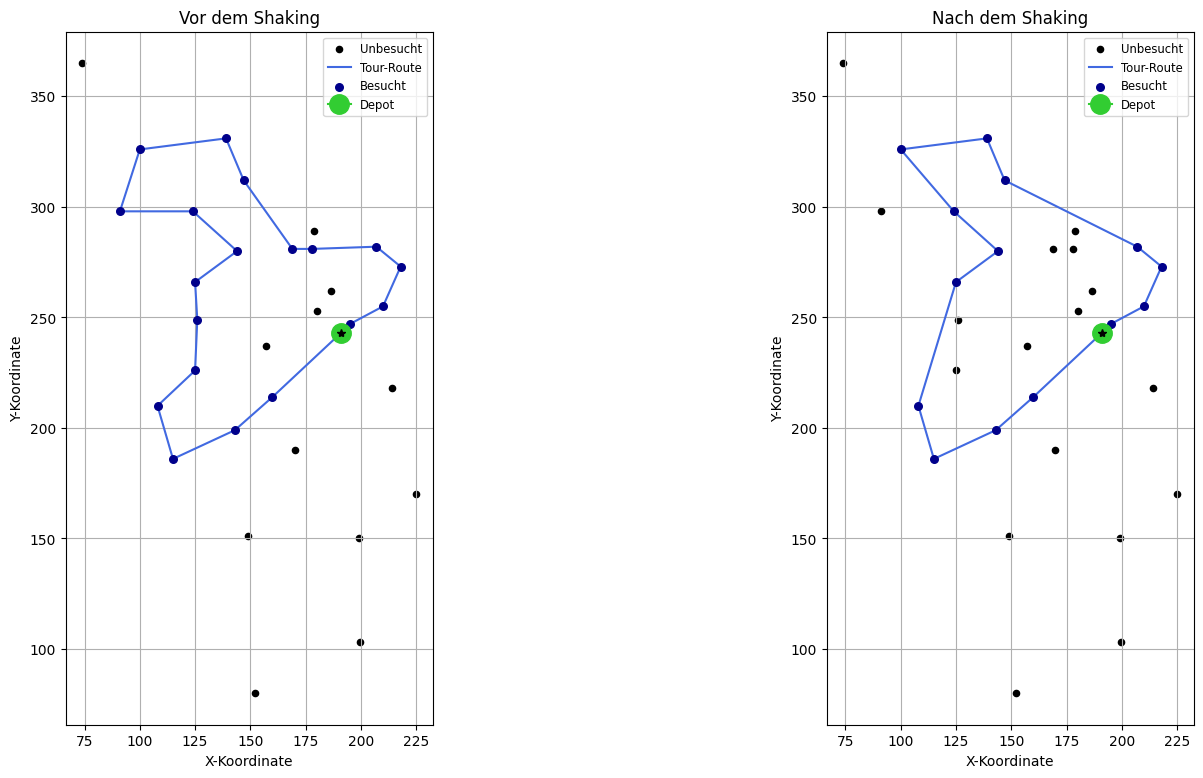

In [13]:
import random
from InputData import InputData
from OutputData import TourSolution
from Neighborhood import NeighborhoodGenerator


data = InputData("Instanzen/Instance_3.json")
gute_loesung_tour = [1, 24, 22, 7, 5, 14, 4, 20, 17, 16, 15, 13, 3, 6, 2, 8, 31, 12, 29, 26, 1]
gute_loesung = TourSolution(gute_loesung_tour, data.time_limit)
gute_loesung.evaluate(data)

print("Ausgangslösung (globales optimum):")
print(gute_loesung)


rnd = random.Random(42)
ng = NeighborhoodGenerator(data, rnd=rnd)


shaken_tour_list = ng.remove_variable(gute_loesung.tour.copy())
shaken_solution = TourSolution(shaken_tour_list, data.time_limit)
shaken_solution.evaluate(data)

print("\nLösung nach dem Shaking:")
print(shaken_solution)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
plot_tour_v2(data, gute_loesung.tour, "Vor dem Shaking", ax=ax1)
plot_tour_v2(data, shaken_solution.tour, "Nach dem Shaking", ax=ax2)
plt.show()

##### __2.9 Demonstration einer Local-Search-Methode__ <br>

Ausgangslösung:
Tour: [1, 28, 27, 26, 24, 22, 12, 10, 9, 13, 1]
Score: 90
Gesamtdistanz: 343.94
Verwendete Zeit: 343.94
Gültig (<= 410): ✅

Lösung nach Anwendung von 'add_best_node':
Tour: [1, 28, 27, 26, 25, 24, 22, 12, 10, 9, 13, 1]
Score: 105
Gesamtdistanz: 354.12
Verwendete Zeit: 354.12
Gültig (<= 410): ✅


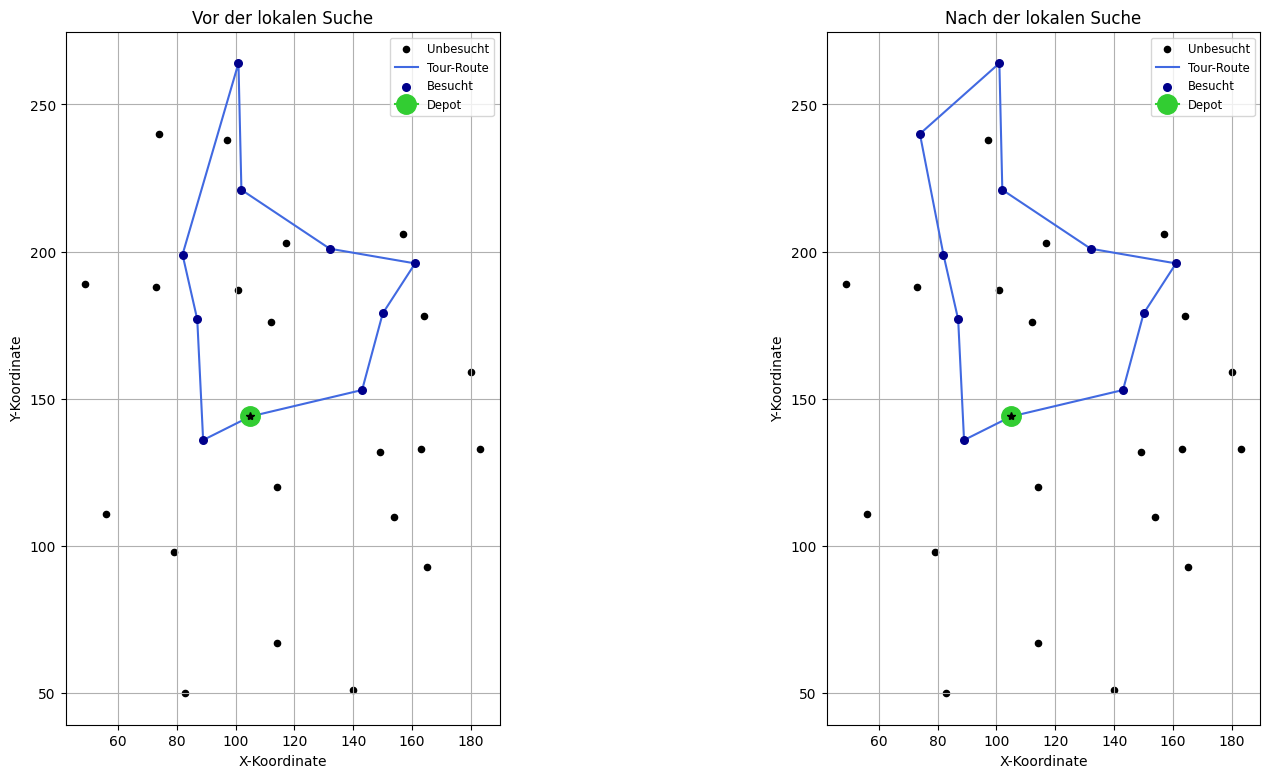

In [15]:
#Beispiel für eine Local-Search-Operation: 'add_best_node'

import random
from InputData import InputData
from OutputData import TourSolution
from Neighborhood import NeighborhoodGenerator

data = InputData("Instanzen/Instance_1.json")


suboptimale_tour_list = [1, 28, 27, 26, 24, 22, 12, 10, 9, 13, 1] 
suboptimale_loesung = TourSolution(suboptimale_tour_list, data.time_limit)
suboptimale_loesung.evaluate(data)
print("Ausgangslösung:")
print(suboptimale_loesung)


rnd = random.Random(42)
ng = NeighborhoodGenerator(data, rnd=rnd)


verbesserte_loesung = ng.add_best_node(suboptimale_loesung)

print("\nLösung nach Anwendung von 'add_best_node':")
print(verbesserte_loesung)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
plot_tour_v2(data, suboptimale_loesung.tour, "Vor der lokalen Suche", ax=ax1)
plot_tour_v2(data, verbesserte_loesung.tour, "Nach der lokalen Suche", ax=ax2)
plt.show()


#### __3. Details/Vorgehen/Entscheidungen__  <br>


##### __3.1 Genaue Beschreibung des Durchlaufes einer Instanz/Wie funktioniert der Algorythmus ?__ 

__Phase 1: InputData.py__ <br>

Einlesen der Rohdaten: Alles beginnt in der InputData-Klasse. Wenn ein Objekt mit einem Dateipfad (z.B. Instanzen/Instance_1.json) erstellt wird, liest die load_data()-Methode die JSON-Datei ein. Sie extrahiert grundlegende Informationen wie den Namen der Instanz und das globale TimeLimit. <br>

Erstellung der Knotenobjekte: Die wichtigste Aufgabe ist es, die Liste der Knoten aus der JSON-Datei zu durchlaufen und für jeden Knoten ein Node-Objekt zu erstellen. Jedes dieser Objekte speichert seine ID, seine X/Y-Koordinaten und seinen Score. <br>

Berechnung der Distanzmatrix (Effizienz-Boost): Dies ist ein entscheidender Schritt. Anstatt bei jeder Anfrage die Distanz zwischen zwei Knoten per Satz des Pythagoras neu zu berechnen, wird dies einmalig zu Beginn in der compute_distance_matrix()-Methode erledigt. Das Ergebnis ist eine zweidimensionale Liste (Matrix), in der man die Distanz zwischen Knoten i und j sofort nachschlagen kann (z.B. distance_matrix[i-1][j-1]). Dieser vorberechnete "Cache" beschleunigt alle nachfolgenden Operationen massiv. <br>

__Phase 2: ConstructiveHeuristic.py & StartSolutionSelector.py__ <br>
 
Anforderung einer Startlösung: Der Prozess wird im Notebook durch den Aufruf von select_best_start_solution() angestoßen. Diese Funktion entscheidet, welche Heuristiken (z.B. greedy und best_insertion) sie testen möchte. <br>

usführung einer Heuristik (z.B. best_insertion_solution):

Die Heuristik startet mit einer minimalen Tour: [1, 1].

Sie iteriert nun durch alle noch nicht besuchten Knoten. Für jeden dieser Knoten testet sie jede mögliche Einfügeposition in der aktuellen Tour. <br>

Für jede hypothetische Einfügung (z.B. [1, <neuer_knoten>, 1]) wird die Gesamtdistanz der resultierenden neuen Tour berechnet, indem die get_distance()-Methode aus InputData wiederholt aufgerufen wird. <br>

Die Heuristik prüft, ob diese neue Gesamtdistanz das TimeLimit der Instanz überschreiten würde.<br>

Gleichzeitig berechnet sie den "Insertion Cost" – also um wie viel die Gesamtdistanz durch das Einfügen ansteigt. <br>

Nachdem alle Knoten an allen Positionen getestet wurden, wird derjenige Zug ausgeführt, der die Distanz am geringsten erhöht und das Zeitlimit nicht verletzt. <br>

Auswahl der besten Startlösung: select_best_start_solution vergleicht die von den verschiedenen Heuristiken erzeugten Touren und wählt diejenige mit dem höchsten initialen Score als Startpunkt für die VNS. <br>

__Phase 3: VNS.py & Neighborhood.py__ <br>

Start der VNS: Die run_vns-Funktion erhält die beste Startlösung. Diese wird zur initialen current- und best-Lösung.<br>

Der VNS-Zyklus beginnt: <br>
a. Shaking (Neighborhood.py): Die current-Tour wird an eine zufäälig gewählt (ZUfällig ist bei Seed setzung relativ) Shaking-Methode wie remove_k_random_nodes übergeben. Diese Methode manipuliert nur die Liste der Knoten-IDs, z.B. indem sie einige entfernt. Das Ergebnis ist eine neue, "kaputte" Tour-Liste.<br>
b. Reparatur und Neubewertung: Diese kaputte Tour wird an greedy_repair oder direkt an den TourSolution-Konstruktor übergeben. Hier passiert etwas Wichtiges: <br>
* Der TourSolution-Konstruktor stellt sicher, dass die Tour wieder mit 1 beginnt und endet. <br>
* Die evaluate()-Methode wird aufgerufen. Sie berechnet Score und Gesamtdistanz der neuen, gestörten Tour von Grund auf neu, indem sie wiederholt input_data.get_distance() verwendet. <br>
c. Lokale Suche (VND in VNS.py): Die neue shaken-Lösung wird nun an die erste lokale Suchmethode (z.B. add_best_node) übergeben. <br>
* add_best_node testet systematisch das Hinzufügen von externen Knoten an allen Positionen. <br>
* Für jeden Testzug wird ein neues TourSolution-Objekt erstellt und mit evaluate() dessen Gesamtdistanz und Score berechnet. <br>
* Die Methode findet den Zug, der die Lösung am meisten verbessert (höchster Score oder bei gleichem Score die niedrigste Distanz). <br>
* Das Ergebnis (improved) wird an die VND-Schleife zurückgegeben. Wenn es eine Verbesserung war, wird die VND mit der neuen Lösung von vorne gestartet. Wenn nicht, wird die nächste lokale Suchmethode probiert. <br>
d. Entscheidung in der VNS: Die finale, lokal optimierte Lösung (local_best) wird mit der current-Lösung verglichen. Hierfür werden die bereits berechneten Attribute .score und .total_distance der beiden TourSolution-Objekte verwendet. Es findet keine Neuberechnung der Distanz statt, sondern nur ein Vergleich der finalen Kennzahlen. <br>

__Zusammenfassender Datenfluss:__ <br>

JSON-Datei -> InputData (berechnet Distanzmatrix) -> ConstructiveHeuristic (nutzt get_distance zur Erstellung einer TourSolution) -> TourSolution.evaluate (berechnet Gesamt-Score/-Distanz)<br>
-> VNS (vergleicht die Kennzahlen von TourSolution-Objekten) -> Neighborhood (erzeugt neue Touren, die sofort wieder in TourSolution-Objekte mit evaluate umgewandelt werden).


##### __3.2 Strategie zur Diversifikation und Intensivierung: Ein adaptiver VNS-Ansatz:__ 


Das Herzstück meines VNS-Algorithmus ist das dynamische Zusammenspiel von gezielter Störung (Shaking) und intensiver lokaler Verbesserung (Intensivierung), <br>
um eine Balance zwischen Exploration (dem Erkunden neuer Regionen im Lösungsraum) und Exploitation (der Ausschöpfung vielversprechender Regionen) zu finden.<br>

1. Adaptive Shaking-Phase (Diversifikation): <br>
Um aus lokalen Optima auszubrechen, wird die aktuell beste Lösung (current) in jeder VNS-Iteration durch einen Shaking-Operator gestört. Die Auswahl und Intensität dieser Störung sind nicht statisch, sondern adaptiv.  <br>
Ich habe hierfür einen Pool von fünf unterschiedlichen Shaking-Operatoren implementiert: <br>

- remove_k_random_nodes: Entfernt eine kleine, feste Anzahl zufälliger Knoten. <br>

- shuffle_segment: Bewahrt die Knotenzusammensetzung, ändert aber lokal die Reihenfolge. <br>

- remove_variable: Entfernt einen variablen prozentualen Anteil von Knoten, was zu stärkeren Störungen führen kann. <br>

- remove_worst_nodes: Eine  Störung, die score-schwache Knoten entfernt. <br>

- swap_large_segments: Eine Veränderung, die große Teile der Tour-Struktur neu anordnet.<br>

Die Auswahl, welcher dieser Operatoren angewendet wird, erfolgt in jeder Shaking-Phase zufällig. Dies verhindert, dass die Suche in deterministischen Zyklen gefangen wird. (Nur durch globale Seed Setzung 100% reproduzierbar)
Noch wichtiger ist die adaptive Intensität:  <br>
Die Anzahl der angewendeten Shaking-Operatoren pro Iteration wird dynamisch erhöht. Sie beginnt mit einer einzigen, zufälligen Operation. Bleibt die Suche über längere Zeit ohne Verbesserung (gemessen am no_improvement_counter), wird die Anzahl der Operationen schrittweise bis auf ein Maximum von fünf erhöht. Dieser Mechanismus sorgt für eine sanfte Störung, solange Fortschritt erzielt wird, und für eine zunehmend "brutalere" Störung, um tiefe lokale Optima bei anhaltender Stagnation zu verlassen. (Das habe ich implementiert nachdem ich lange probleme hatte bei Instnace 4 und 5 aus einem localen Optimum auszubrechen, ohne dabei direkt auch bei kleineren Instancen zu stark zu shaken)

2. Variable Neighborhood Descent (VND) als lokale Suche (Intensivierung): <br>
Nach jeder Shaking-Phase wird die resultierende, gestörte Lösung einer intensiven lokalen Suche unterzogen, die als Variable Neighborhood Descent (VND) implementiert ist. Im Gegensatz zum stochastischen Shaking ist die VND ein systematischer und deterministischer Prozess. Es durchläuft eine vordefinierte, geordnete Liste von vier Nachbarschaftsstrukturen: <br>

- add_best_node (Knoten hinzufügen) <br>

- insert_best_node_at_best_position (Knoten an bester Position einfügen) <br>

- replace_node (Knoten austauschen) <br>

- segment_move (Tour-Segment verschieben)<br>

Die VND-Schleife beginnt immer mit der ersten Nachbarschaftsstruktur. Sobald eine Methode eine verbessernde Lösung findet (nach dem "Best Improvement"-Prinzip), wird die Suche sofort mit der verbesserten Lösung bei der ersten Nachbarschaftsstruktur neu gestartet. Dieser Zyklus wird so lange wiederholt, bis keine der vier Methoden die Lösung weiter verbessern kann. <br> 
Das Ergebnis ist ein garantiert lokal optimaler Punkt in Bezug auf alle definierten Nachbarschaften. <br>
Diese aggressive Intensivierung stellt sicher, dass das volle Potenzial jeder durch das Shaking erreichten Region des Lösungsraums ausgeschöpft wird. <br>


##### __3.3 Wahl der lokalen Suchstrategie: Best Improvement vs. First Improvement__ <br>


Meine lokale Suche ist als eine Variable Neighborhood Descent (VND) implementiert, die eine hybride Strategie aus Best und First Improvement verfolgt.<br>

Auf der untersten Ebene, innerhalb jeder einzelnen Nachbarschaftsstruktur (z.B. beim Hinzufügen eines Knotens) wird eine Best-Improvement-Strategie angewendet. <br>
Das bedeutet, der Algorithmus prüft alle möglichen Züge dieser Art und wählt nur den absolut besten aus. Dies sorgt für eine maximale Qualitätssteigerung bei jedem einzelnen Schritt.<br>

Auf der höheren Ebene, beim Wechsel zwischen den verschiedenen Methoden (add_best_node, replace_node, etc.), greift eine First-Improvement-Logik. Sobald eine dieser Methoden eine beliebige Verbesserung liefert, wird die Suche sofort mit der neuen, besseren Lösung bei der ersten Methode neu gestartet. Dieser Mechanismus priorisiert die wirkungsvollsten Methoden und sorgt für eine schnelle Konvergenz, ohne unnötig Zeit in weniger effektiven Methoden zu verbringen.<br>

#### __4. Verworfene/ Getestete Inhalte__  <br>

__In ConstructiveHeuristic.py (Startlösungen):__

random_solution: Erzeugt eine rein zufällige Starttour.

clustered_greedy_solution: Gruppiert Knoten nach Winkel und löst lokal.

shortest_path_solution: Baut Tour gierig nach kürzester Distanz auf.

efficiency_direct_solution: Baut Tour nach bestem Score/Distanz-Verhältnis auf.

greedy_shuffle_start_solution: Startet die greedy-Heuristik von einem zufälligen Knoten.

Die wurden alle mit getestet, aber greedy und best_insertion haben sich als die robustesten Startpunkte erwiesen.

__In Neighborhood.py (Shaking & Local Search):__

greedy_repair: Fügt nach starker Zerstörung die besten Knoten wieder hinzu (wird zwar aufgerufen, aber die Parameter Analyse zeigt, dass repair_shaking=False oft besser ist).

__In VNS.py (Konzepte)__

First Improvement: Die Strategie, den ersten gefundenen verbessernden Zug sofort auszuführen. Wurde testweise implementiert, aber die Best_Improvement-Strategie erwies sich als überlegen.

Feste Shaking-Struktur (k_shake): Das VNS-Standardkonzept, die Nachbarschaftsstruktur im Shaking systematisch zu wechseln (k=1, 2, 3...), habe ich durch eine adaptive, zufallsbasierte Shaking-Strategie (random_modify) ersetzt, die sich als flexibler und effektiver erwies.



#### __5. Visuelle Darstellung StartLösung/FinalVNS & HEATMAP__  <br>

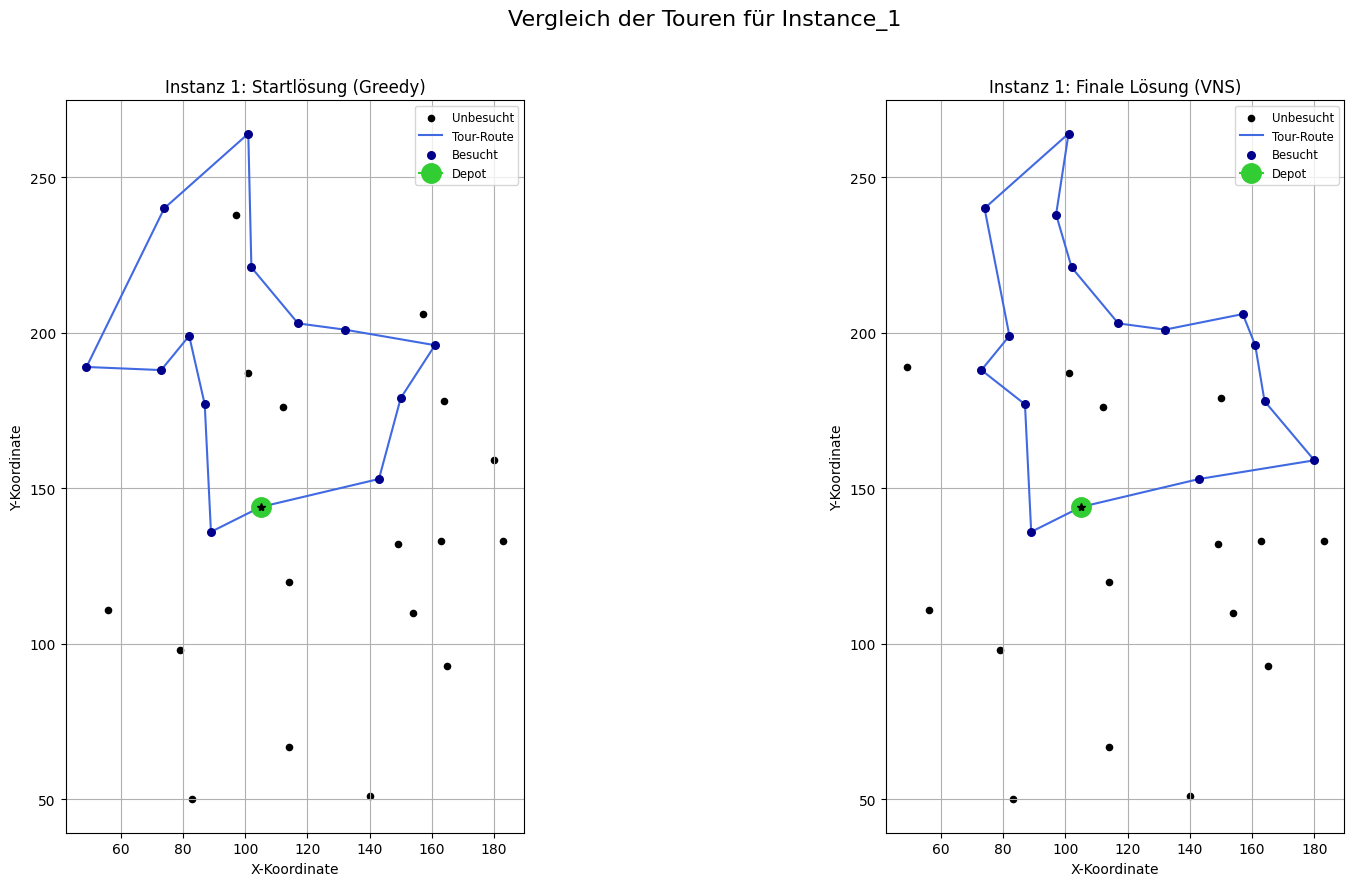

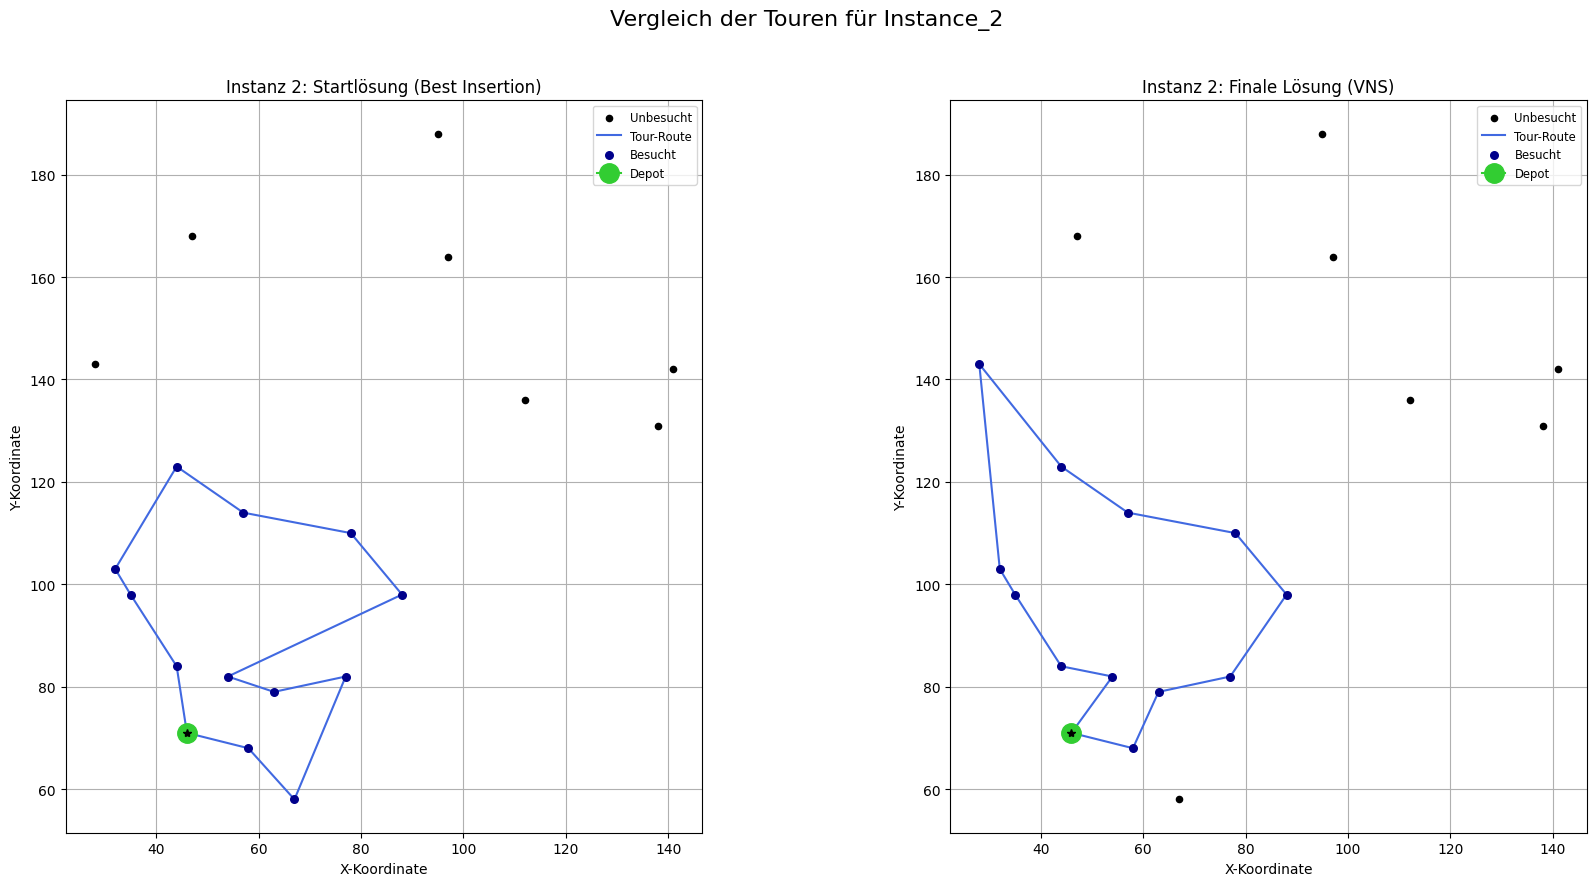

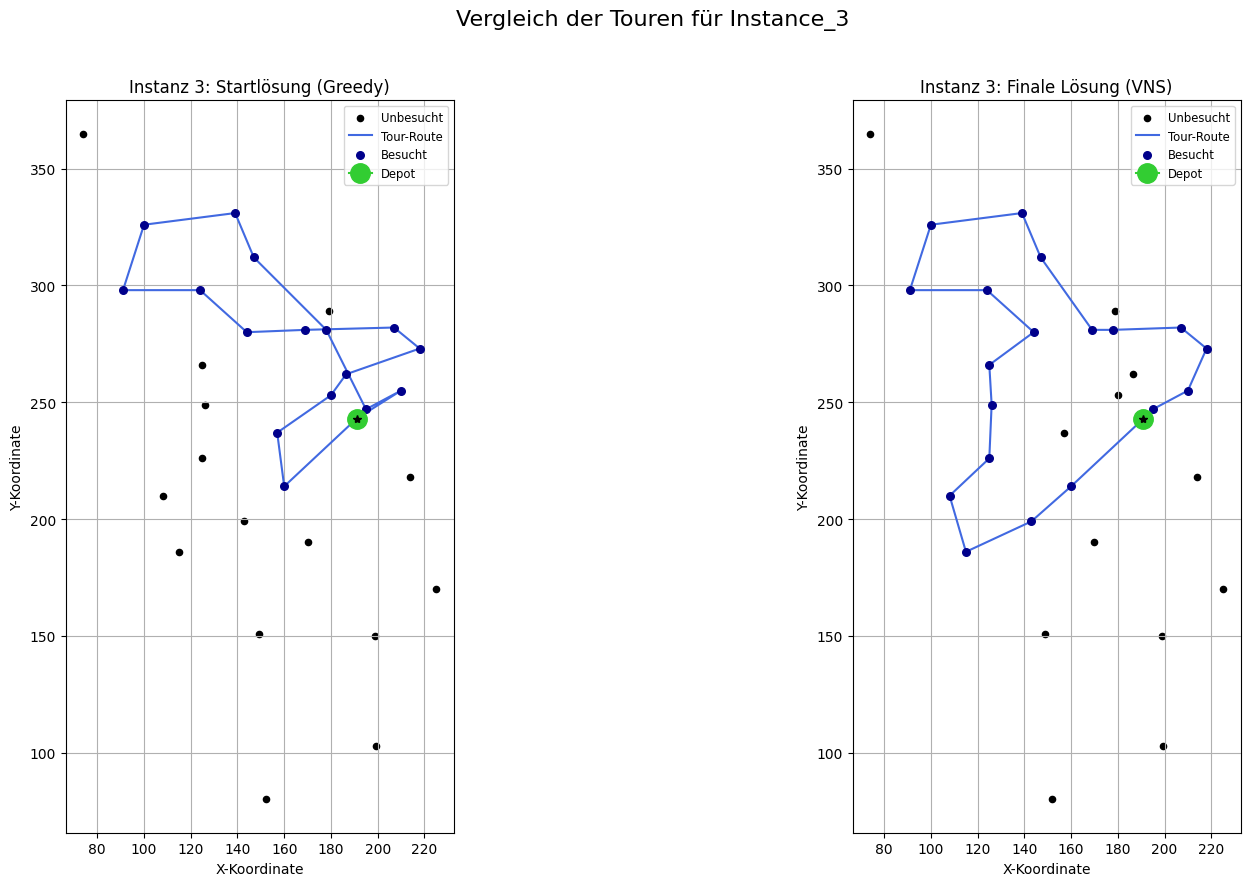

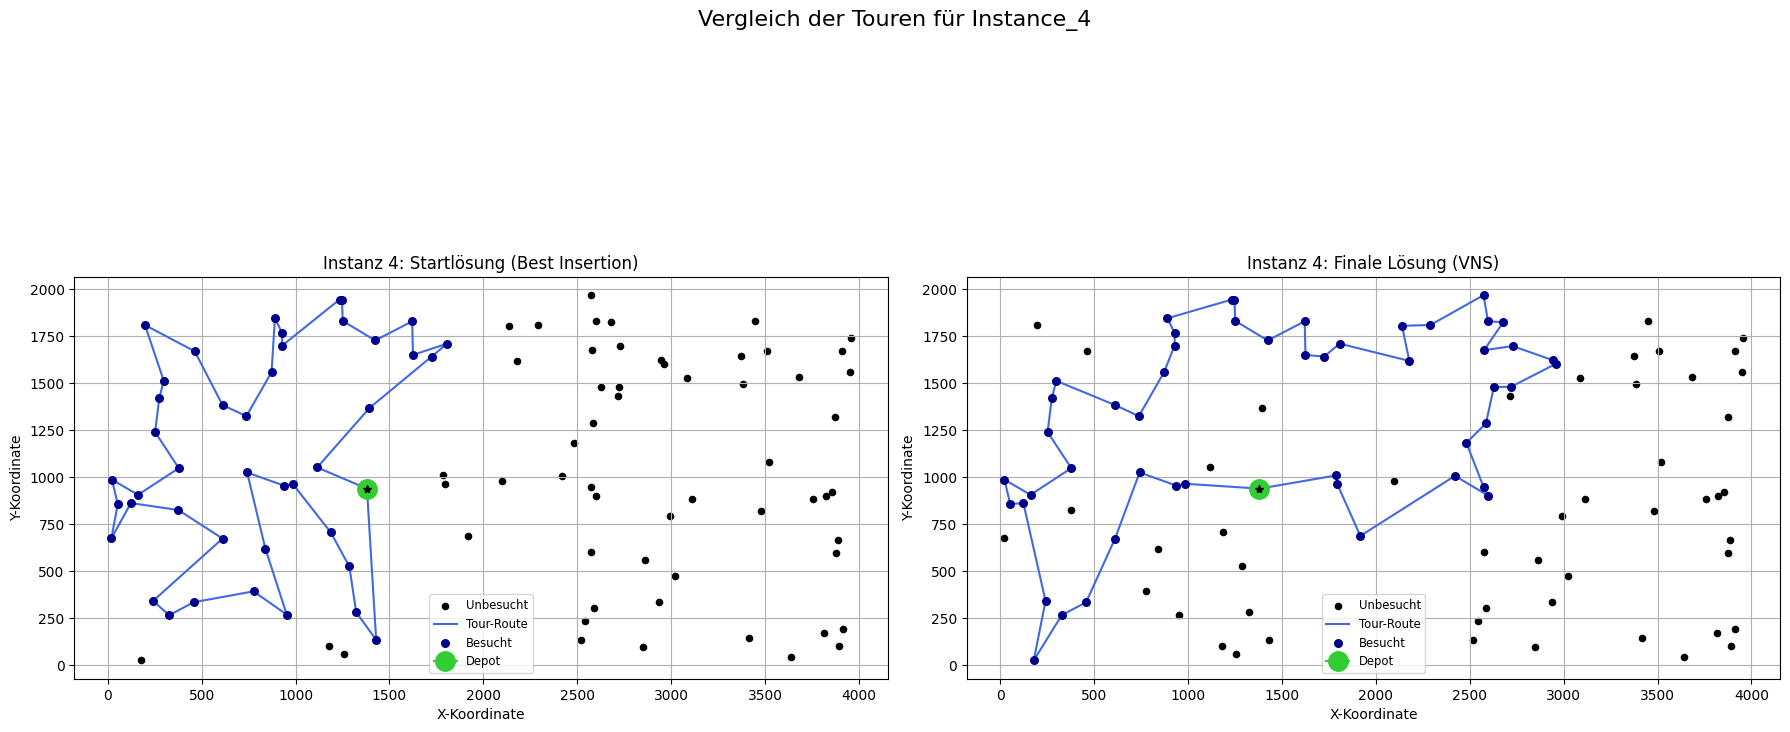

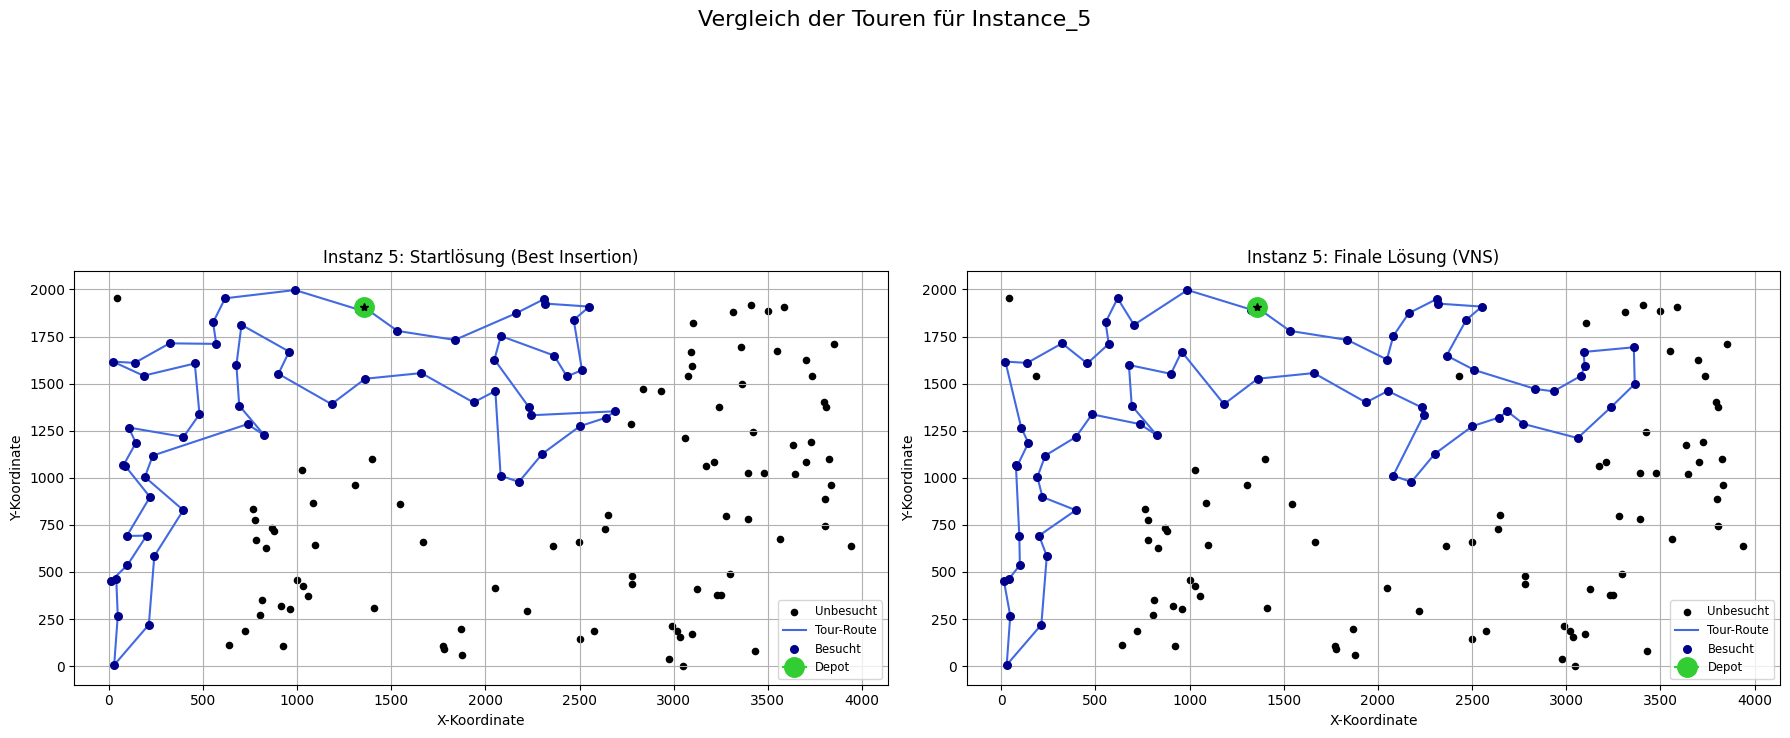

In [ ]:
import matplotlib.pyplot as plt
from InputData import InputData


def plot_tour_v2(input_data, tour, title="Tour", ax=None):
    """
    Zeichnet eine gegebene Tour und hebt besuchte vs. unbesuchte Knoten klar hervor.
    """
    coords = {node.id: (node.x, node.y) for node in input_data.nodes}
    
    visited_ids = set(tour)
    unvisited_ids = set(coords.keys()) - visited_ids

    tour_x = [coords[node_id][0] for node_id in tour]
    tour_y = [coords[node_id][1] for node_id in tour]
    
    unvisited_x = [coords[node_id][0] for node_id in unvisited_ids]
    unvisited_y = [coords[node_id][1] for node_id in unvisited_ids]

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.scatter(unvisited_x, unvisited_y, c='black', s=20, zorder=1, label='Unbesucht')
    ax.plot(tour_x, tour_y, linestyle='-', color='royalblue', zorder=2, label='Tour-Route')
    ax.scatter(tour_x, tour_y, c='darkblue', s=30, zorder=3, label='Besucht')

    if tour:
        ax.plot(tour_x[0], tour_y[0], marker='o', color='limegreen', markersize=14, zorder=4, label='Depot')
        ax.plot(tour_x[0], tour_y[0], marker='*', color='black', markersize=6, zorder=5)

    ax.set_title(title, fontsize=12)
    ax.set_xlabel("X-Koordinate")
    ax.set_ylabel("Y-Koordinate")
    ax.legend(fontsize='small')
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')


# --- Instanz 1 ---
# Startlösung für Instanz 1 war 'greedy' mit Score 135
start_tour_i1 = [1, 28, 27, 26, 31, 30, 25, 24, 22, 21, 12, 10, 9, 13, 1]
final_tour_i1 = [1, 28, 27, 31, 26, 25, 24, 23, 22, 21, 12, 11, 10, 8, 2, 13, 1]

# --- Instanz 2 ---
# Startlösung für Instanz 2 war 'best_insertion' mit Score 200
start_tour_i2 = [1, 7, 6, 5, 3, 2, 8, 9, 12, 11, 10, 14, 13, 1]
final_tour_i2 = [1, 12, 7, 6, 5, 4, 3, 2, 8, 9, 10, 11, 13, 1]

# --- Instanz 3 ---
# Startlösung für Instanz 3 war 'greedy' mit Score 410
start_tour_i3 = [1, 22, 24, 14, 20, 17, 16, 15, 13, 3, 4, 5, 7, 27, 23, 32, 26, 1] 
final_tour_i3 = [1, 26, 29, 12, 31, 8, 2, 6, 3, 13, 15, 16, 17, 20, 4, 14, 5, 7, 22, 24, 1]

# --- Instanz 4 ---
# Startlösung für Instanz 4 war 'best_insertion' mit Score 2223
start_tour_i4 = [1, 89, 42, 8, 92, 6, 49, 90, 75, 56, 97, 4, 65, 66, 19, 53, 16, 70, 22, 94, 88, 79, 18, 24, 38, 99, 36, 84, 10, 72, 59, 74, 21, 17, 15, 11, 32, 45, 91, 23, 98, 47, 63, 1]
final_tour_i4 = [1, 6, 49, 90, 19, 4, 65, 26, 66, 16, 22, 94, 88, 79, 18, 24, 38, 84, 10, 72, 21, 74, 59, 17, 15, 11, 32, 45, 91, 98, 23, 77, 60, 62, 35, 86, 27, 20, 12, 55, 83, 7, 57, 87, 51, 25, 81, 61, 67, 28, 93, 1]

# --- Instanz 5 ---
# Startlösung für Instanz 5 war 'best_insertion' mit Score 3164
start_tour_i5 = [1, 85, 15, 110, 20, 64, 42, 55, 47, 31, 67, 79, 13, 65, 147, 6, 149, 104, 80, 77, 115, 130, 107, 27, 40, 12, 46, 125, 24, 142, 29, 49, 18, 16, 63, 66, 48, 96, 87, 150, 11, 52, 84, 103, 128, 44, 51, 127, 135, 146, 120, 37, 61, 9, 82, 78, 26, 132, 32, 117, 137, 53, 1]
final_tour_i5 = [1, 85, 15, 13, 79, 110, 20, 64, 42, 55, 67, 47, 134, 75, 22, 112, 8, 114, 108, 113, 138, 54, 6, 149, 104, 80, 77, 115, 147, 65, 130, 107, 27, 40, 12, 125, 46, 142, 29, 49, 18, 37, 120, 16, 63, 44, 66, 103, 48, 96, 87, 150, 52, 11, 84, 128, 127, 51, 135, 146, 82, 78, 26, 61, 132, 32, 117, 24, 137, 53, 1]

all_data = {
    1: {"data": InputData("Instanzen/Instance_1.json"), "start": start_tour_i1, "final": final_tour_i1, "start_method": "Greedy"},
    2: {"data": InputData("Instanzen/Instance_2.json"), "start": start_tour_i2, "final": final_tour_i2, "start_method": "Best Insertion"},
    3: {"data": InputData("Instanzen/Instance_3.json"), "start": start_tour_i3, "final": final_tour_i3, "start_method": "Greedy"},
    4: {"data": InputData("Instanzen/Instance_4.json"), "start": start_tour_i4, "final": final_tour_i4, "start_method": "Best Insertion"},
    5: {"data": InputData("Instanzen/Instance_5.json"), "start": start_tour_i5, "final": final_tour_i5, "start_method": "Best Insertion"},
    # Fügen Sie hier Instanz 6 hinzu, wenn Sie sie testen
    
}

for i, d in all_data.items():
    fig, (ax_start, ax_final) = plt.subplots(1, 2, figsize=(18, 9))
    
    # Plot für die Startlösung
    plot_tour_v2(d["data"], d["start"], f"Instanz {i}: Startlösung ({d['start_method']})", ax=ax_start)
    
    # Plot für die finale Lösung
    plot_tour_v2(d["data"], d["final"], f"Instanz {i}: Finale Lösung (VNS)", ax=ax_final)
    
    fig.suptitle(f"Vergleich der Touren für {d['data'].name}", fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

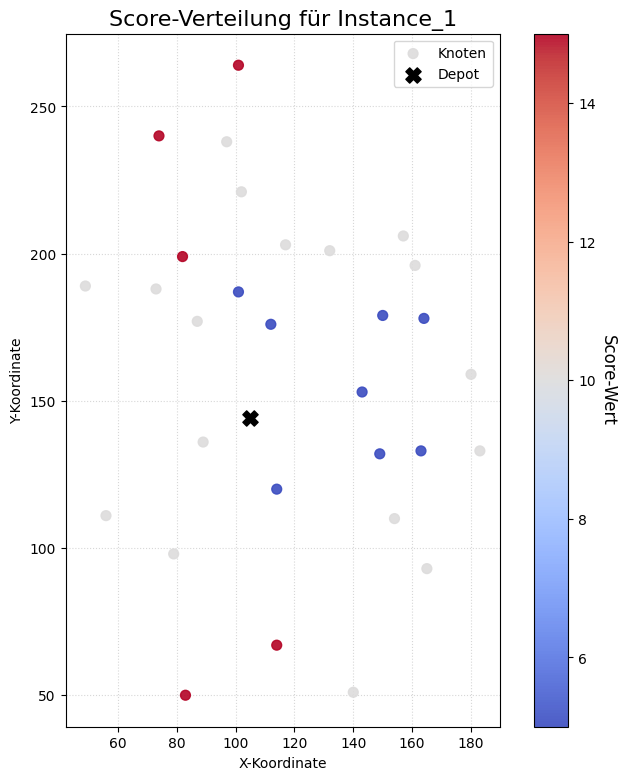

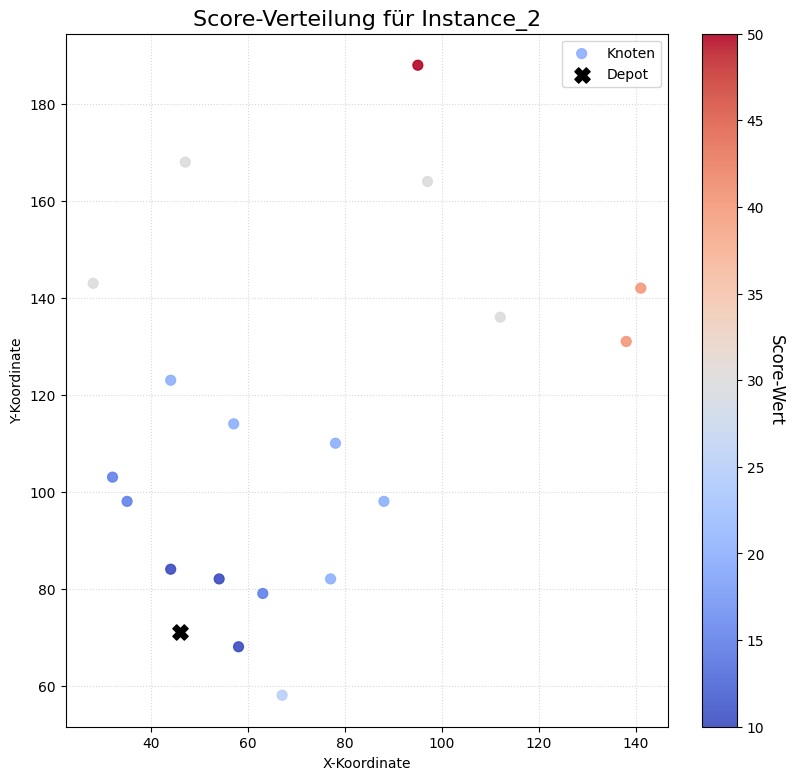

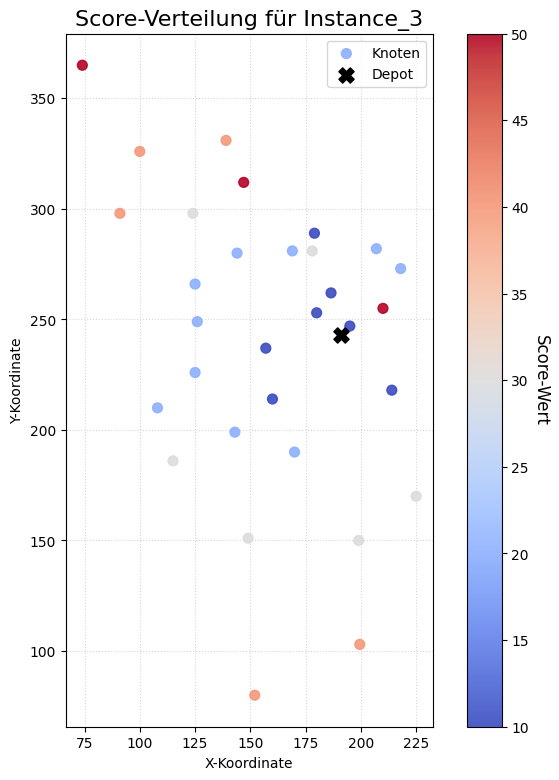

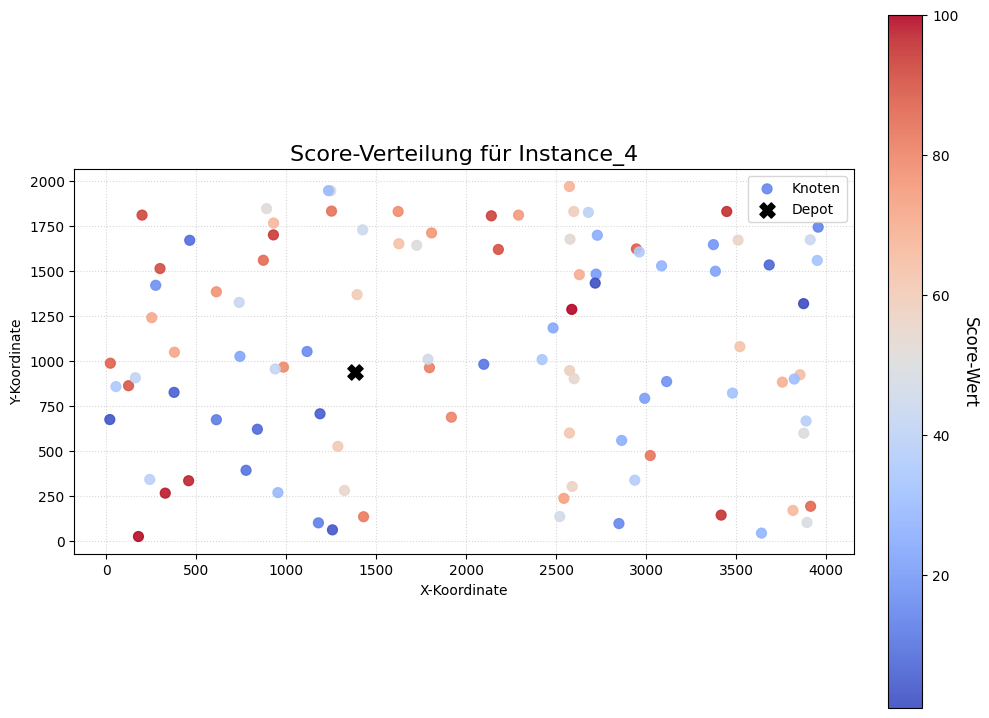

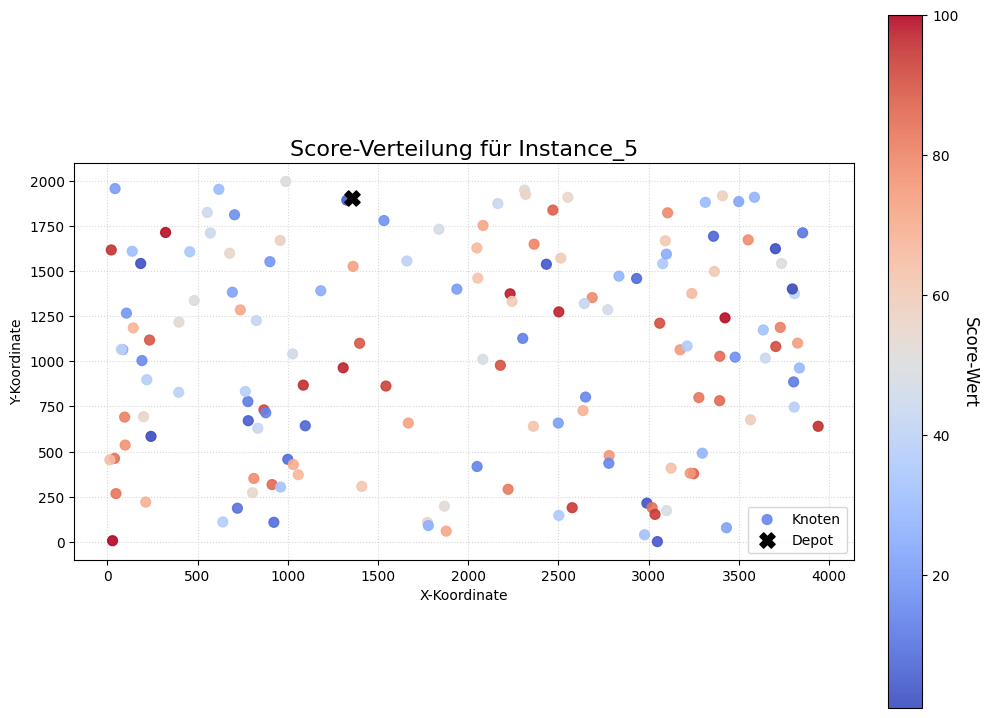

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from InputData import InputData

def plot_score_heatmap_v2(input_data, ax=None):
    """
    Erstellt einen Scatter-Plot, der als reine Farb-Heatmap der Knoten-Scores fungiert.
    Alle Punkte haben die gleiche Größe.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
        
    nodes_data = [{"id": n.id, "x": n.x, "y": n.y, "score": n.score} for n in input_data.nodes if n.id != 1]
    df = pd.DataFrame(nodes_data)

    depot = input_data.nodes[0]

    scatter = ax.scatter(df['x'], df['y'], c=df['score'], 
                         cmap='coolwarm', s=50, 
                         alpha=0.9, zorder=2, label="Knoten")
    

    ax.scatter(depot.x, depot.y, c='black', s=120, marker='X', zorder=3, label='Depot')

    cbar = plt.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Score-Wert', rotation=270, labelpad=15, fontsize=12)

    ax.set_title(f'Score-Verteilung für {input_data.name}', fontsize=16)
    ax.set_xlabel("X-Koordinate")
    ax.set_ylabel("Y-Koordinate")
    ax.grid(True, linestyle=':', alpha=0.5)
    ax.set_aspect('equal', adjustable='box')
    ax.legend()
    

for i in range(1, 6):
    filename = f"Instanzen/Instance_{i}.json"
    data = InputData(filename)
    
    fig, ax = plt.subplots(figsize=(11, 9)) 
    plot_score_heatmap_v2(data, ax=ax)
    
    plt.show()

#### __6. Literatur__  <br>


Orienteering Problem :
- European Journal of Operational Research 209 (2011) - The orienteering problem: A survey from Pieter Vansteenwegena, Wouter Souffriaua & Dirk Van Oudheusdena
- Orienteering Problems -  Models and Algorithms for Vehicle Routing Problems with Profits from Pieter Vansteenwegena & Aldy Gunawan

VNS : 
- A Tutorial on Variable Neighborhood Search from Pierre Hansen & Nenad Mladenovic (2003)  ISSN: 0711–2440
- Variable neighborhood search: basics and variants from Pierre Hansen, Nenad Mladenovic, Raca Todosijevic & Said Hannafi (2017) Pages 423-454

VND : 
- Variable Neighborhood Descent from Abraham Duarte, Nenad Mladenovic, Jesus Sanchez-Oro & Raca Todosijevic